In [40]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [41]:
datafile = 'ex1data1.txt'
cols = np.loadtxt(datafile, delimiter=',', usecols=(0,1), unpack=True)
print 'X1: ', cols
X = np.transpose(np.array(cols[:-1]))
print X
y = np.transpose(np.array(cols[-1:]))

m = y.size
X = np.insert(X, 0, 1, axis=1)

X1:  [[  6.1101    5.5277    8.5186    7.0032    5.8598    8.3829    7.4764
    8.5781    6.4862    5.0546    5.7107   14.164     5.734     8.4084
    5.6407    5.3794    6.3654    5.1301    6.4296    7.0708    6.1891
   20.27      5.4901    6.3261    5.5649   18.945    12.828    10.957
   13.176    22.203     5.2524    6.5894    9.2482    5.8918    8.2111
    7.9334    8.0959    5.6063   12.836     6.3534    5.4069    6.8825
   11.708     5.7737    7.8247    7.0931    5.0702    5.8014   11.7
    5.5416    7.5402    5.3077    7.4239    7.6031    6.3328    6.3589
    6.2742    5.6397    9.3102    9.4536    8.8254    5.1793   21.279
   14.908    18.959     7.2182    8.2951   10.236     5.4994   20.341
   10.136     7.3345    6.0062    7.2259    5.0269    6.5479    7.5386
    5.0365   10.274     5.1077    5.7292    5.1884    6.3557    9.7687
    6.5159    8.5172    9.1802    6.002     5.5204    5.0594    5.7077
    7.6366    5.8707    5.3054    8.2934   13.394     5.4369 ]
 [ 17.592     9

In [42]:
# print X

In [43]:
print theta

[[-3.63606348]
 [ 1.16698916]]


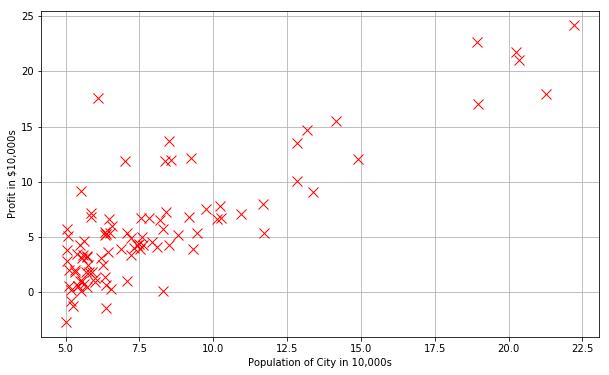

In [44]:

#Plot the data to see what it looks like
plt.figure(figsize=(10,6))
plt.plot(X[:,1],y[:,0],'rx',markersize=10)
plt.grid(True) #Always plot.grid true!
plt.ylabel('Profit in $10,000s')
plt.xlabel('Population of City in 10,000s')

In [45]:
############## Gradient Descent ################

In [46]:
iterations = 1500
alpha = 0.01

In [47]:
def h(theta, X):
    # print np.dot(X, theta)
    return np.dot(X, theta)

def compute_cost(theta,X,y):
    return float((1./(2*m)) * np.dot((h(theta,X)-y).T,(h(theta,X)-y)))

initial_theta = np.zeros((X.shape[1],1))
print X.shape

(97, 2)


In [48]:
print compute_cost(initial_theta, X, y)
print initial_theta

32.0727338775
[[ 0.]
 [ 0.]]


In [49]:
print np.zeros([2,2])

[[ 0.  0.]
 [ 0.  0.]]


In [50]:
#Actual gradient descent minimizing routine
def descendGradient(X, theta_start = np.zeros(2)):
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    """
    theta = theta_start
    jvec = [] #Used to plot cost as function of iteration
    thetahistory = [] #Used to visualize the minimization path later on
    for meaninglessvariable in xrange(iterations):
        tmptheta = theta
        jvec.append(compute_cost(theta,X,y))
        # Buggy line
        #thetahistory.append(list(tmptheta))
        # Fixed line
        thetahistory.append(list(theta[:,0]))
        #Simultaneously updating theta values
        for j in xrange(len(tmptheta)):
            tmptheta[j] = theta[j] - (alpha/m)*np.sum((h(initial_theta,X) - y)*np.array(X[:,j]).reshape(m,1))
        theta = tmptheta
    return theta, thetahistory, jvec

In [51]:
print theta

[[-3.63606348]
 [ 1.16698916]]


[[-3.63606348]
 [ 1.16698916]]


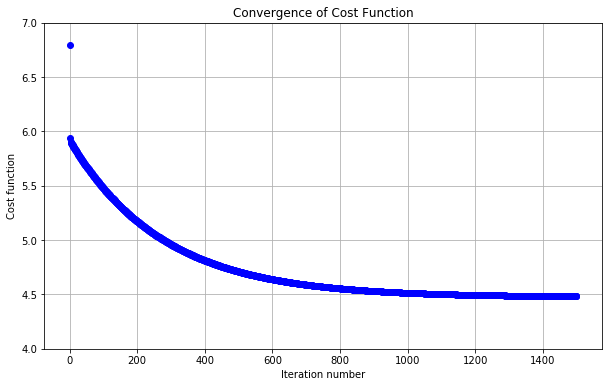

In [52]:
#Actually run gradient descent to get the best-fit theta values
initial_theta = np.zeros((X.shape[1],1))
theta, thetahistory, jvec = descendGradient(X,initial_theta)
print theta
#Plot the convergence of the cost function
def plotConvergence(jvec):
    plt.figure(figsize=(10,6))
    plt.plot(range(len(jvec)),jvec,'bo')
    plt.grid(True)
    plt.title("Convergence of Cost Function")
    plt.xlabel("Iteration number")
    plt.ylabel("Cost function")
    dummy = plt.xlim([-0.05*iterations,1.05*iterations])
    #dummy = plt.ylim([4,8])


plotConvergence(jvec)
dummy = plt.ylim([4,7])


In [53]:
initial_theta = np.zeros((X.shape[1],1))
def GradientDescent(X, y,theta, alpha, num_iters):
    for i in range(num_iters):
        k = 0
        g = 0
        h_theta = h(theta, X)
        for j in range(m):
            k = k + (h_theta[j] - y[j]) * X[j,0]
            g = g + (h_theta[j] - y[j]) * X[j,1]
        theta[0] = theta[0] - (alpha/m) * k
        theta[1] = theta[1] - (alpha/m) * g
    
    return theta


In [54]:
GradientDescent(X, y, initial_theta, 0.01, 1500)

array([[-3.63029144],
       [ 1.16636235]])

In [55]:
#### Comment on the logic #####

In [56]:
#### Linear Regression with multiple variables ####

In [57]:
datafile = 'ex1data2.txt'
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1,2),unpack=True)
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
X = np.insert(X,0,1,axis=1)

In [58]:
feature_means = []
feature_std = []
X_norm = X.copy()
for i in range(X.shape[1]):
    feature_means.append(np.mean(X_norm[:,i]))
    print feature_means
    feature_std.append(np.std(X_norm[:,i]))
    if not i: continue
    X_norm[:,i] = (X_norm[:,i] - feature_means[i]) / feature_std[i] 

[1.0]
[1.0, 2000.6808510638298]
[1.0, 2000.6808510638298, 3.1702127659574466]


In [59]:
#### Multivariate Gradient Descent ####

In [99]:
def h(theta, X):
    # print np.dot(X, theta)
    return np.dot(X, theta)

def compute_cost(theta,X,y,m):
    return float((1./(2*m)) * np.dot((h(theta,X)-y).T,(h(theta,X)-y)))

In [100]:
initial_theta = np.zeros((Xnorm.shape[1], 1))
m = y.size
compute_cost(initial_theta, X_norm, y, m)

65591548106.45744

In [114]:
def gradientDescentMulti(X, y, theta, alpha, num_iters,n):
    for i in range(num_iters):
        theta_new = theta
        for j in range(n):
            theta_new[j] = theta[j] - ((alpha / m) * np.sum((h(theta, X)-y) * X[:,j]))
        theta = theta_new
    return theta

In [115]:
gradientDescentMulti(X_norm,y, initial_theta, 0.01, 400,3)

array([[ 340412.65957447],
       [ 109371.67272252],
       [  -6502.3992545 ]])

In [116]:
from numpy.linalg import inv
def normEqn(X,y):
    return np.dot(np.dot(inv(np.dot(X.T,X)), X.T), y)

In [112]:
def h(theta,X): #Linear hypothesis function
    return np.dot(X,theta)

def computeCost(mytheta,X,y): #Cost function
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    y is a matrix with m- rows and 1 column
    """
    #note to self: *.shape is (rows, columns)
    return float((1./(2*m)) * np.dot((h(mytheta,X)-y).T,(h(mytheta,X)-y)))

#Test that running computeCost with 0's as theta returns 32.07:

initial_theta = np.zeros((X.shape[1],1)) #(theta is a vector with n rows and 1 columns (if X has n features) )
print computeCost(initial_theta,X,y)

#Actual gradient descent minimizing routine
def descendGradient(X, theta_start = np.zeros(2)):
    """
    theta_start is an n- dimensional vector of initial theta guess
    X is matrix with n- columns and m- rows
    """
    theta = theta_start
    jvec = [] #Used to plot cost as function of iteration
    thetahistory = [] #Used to visualize the minimization path later on
    for meaninglessvariable in xrange(iterations):
        tmptheta = theta
        jvec.append(computeCost(theta,X,y))
        # Buggy line
        #thetahistory.append(list(tmptheta))
        # Fixed line
        thetahistory.append(list(theta[:,0]))
        #Simultaneously updating theta values
        for j in xrange(len(tmptheta)):
            tmptheta[j] = theta[j] - (alpha/m)*np.sum((h(initial_theta,X) - y)*np.array(X[:,j]).reshape(m,1))
        theta = tmptheta
    return theta, thetahistory, jvec

datafile = 'ex1data2.txt'
#Read into the data file
cols = np.loadtxt(datafile,delimiter=',',usecols=(0,1,2),unpack=True) #Read in comma separated data
#Form the usual "X" matrix and "y" vector
X = np.transpose(np.array(cols[:-1]))
y = np.transpose(np.array(cols[-1:]))
m = y.size # number of training examples
#Insert the usual column of 1's into the "X" matrix
X = np.insert(X,0,1,axis=1)

#Feature normalizing the columns (subtract mean, divide by standard deviation)
#Store the mean and std for later use
#Note don't modify the original X matrix, use a copy
stored_feature_means, stored_feature_stds = [], []
Xnorm = X.copy()
for icol in xrange(Xnorm.shape[1]):
    stored_feature_means.append(np.mean(Xnorm[:,icol]))
    stored_feature_stds.append(np.std(Xnorm[:,icol]))
    #Skip the first column
    if not icol: continue
    #Faster to not recompute the mean and std again, just used stored values
    Xnorm[:,icol] = (Xnorm[:,icol] - stored_feature_means[-1])/stored_feature_stds[-1]

#Run gradient descent with multiple variables, initial theta still set to zeros
#(Note! This doesn't work unless we feature normalize! "overflow encountered in multiply")
initial_theta = np.zeros((Xnorm.shape[1],1))
theta, thetahistory, jvec = descendGradient(Xnorm,initial_theta)
print theta

65591548106.5
[[ 340412.56301439]
 [ 109371.67272252]
 [  -6502.3992545 ]]
